In [2]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# for function smoothing
from scipy.interpolate import make_interp_spline, BSpline

In [3]:
data_frame = pd.read_csv("T40.4_Race(NEW).txt",delimiter="\t")

In [4]:
# standardizes dataframe
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)
data_frame=data_frame.replace("2022 (provisional)","2022")
data_frame=data_frame.replace("2023 (provisional)","2023")

In [5]:
# creates dataframes for data with and without 2020 statistics
CF2b = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")&
                 (data_frame["Year Code"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2b = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")&
                (data_frame["Year Code"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFb = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2b_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "Black or African American")& 
           (data_frame["Year Code"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2b_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "Black or African American")& 
                (data_frame["Year Code"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CF2w = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "White")& 
           (data_frame["Notes"] != "Total")&
                 (data_frame["Year Code"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2w = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "White")& 
           (data_frame["Notes"] != "Total")&
                (data_frame["Year Code"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFw = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "White")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2w_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "White")& 
           (data_frame["Year Code"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2w_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "White")& 
                (data_frame["Year Code"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CF2a = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "Asian")& 
           (data_frame["Notes"] != "Total") &
                 (data_frame["Year Code"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2a = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "Asian")& 
           (data_frame["Notes"] != "Total") &
                (data_frame["Year Code"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFa = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "Asian")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMa = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "Asian")& 
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)
CF2a_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Single Race 6"] == "Asian")& 
           (data_frame["Year Code"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2a_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Single Race 6"] == "Asian")& 
                (data_frame["Year Code"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CFa  = CFa.dropna()
CF2a = CF2a.dropna()

In [6]:
# defines x and y values for fitting and graphing
x1b=CF2b["Year"]
x1cb=CFb["Year"]
y1b=CF2b["Crude Rate"]

x2b=CM2b["Year"]
x2cb=CMb["Year"]
y2b=CM2b["Crude Rate"]

x1w=CF2w["Year"]
x1cw=CFw["Year"]
y1w=CF2w["Crude Rate"]

x2w=CM2w["Year"]
x2cw=CMw["Year"]
y2w=CM2w["Crude Rate"]

x1a=CF2a["Year"]
x1ca=CFa["Year"]
y1a=CF2a["Crude Rate"]
y1ca=CFa["Crude Rate"] # included for fitting

x2a=CM2a["Year"]
x2ca=CMa["Year"]
y2a=CM2a["Crude Rate"]

In [7]:
# Fits black data to quadratic curve
coeffFb = np.polyfit(x1b, y1b, 2)
yfitFb = np.polyval(coeffFb,x1b)
resFb = np.sum((y1b  - yfitFb)**2)
coeffMb = np.polyfit(x2b, y2b, 2)
yfitMb = np.polyval(coeffMb,x2b)
resMb = np.sum((y2b  - yfitMb)**2)

stdFb = np.sqrt(resFb/(len(y1b)-3))
stdMb = np.sqrt(resMb/(len(y2b)-3))

In [8]:
# Fits white data
coeffFw = np.polyfit(x1w, y1w, 2)
yfitFw = np.polyval(coeffFw,x1w)
resFw = np.sum((y1w  - yfitFw)**2)
coeffMw = np.polyfit(x2w, y2w, 2)
yfitMw = np.polyval(coeffMw,x2w)
resMw = np.sum((y2w  - yfitMw)**2)

stdFw = np.sqrt(resFw/(len(y1w)-3))
stdMw = np.sqrt(resMw/(len(y2w)-3))

In [9]:
# Fits asian data
coeffFa = np.polyfit(x1ca, y1ca, 2) # fit using 2020 because too few data points
yfitFa = np.polyval(coeffFa,x1ca)
resFa = np.sum((y1ca  - yfitFa)**2)
coeffMa = np.polyfit(x2a, y2a, 2)
yfitMa = np.polyval(coeffMa,x2a)
resMa = np.sum((y2a  - yfitMa)**2)

stdFa = np.sqrt(resFa/(len(y1ca)-3))
stdMa = np.sqrt(resMa/(len(y2a)-3))

In [10]:
# Smooths out graphs
x2cw_x = np.linspace(x2cw.min(), x2cw.max(), 300)
spl = make_interp_spline(x2cw, np.polyval(coeffMw,x2cw), k=3)
x2cw_y = spl(x2cw_x)

x2cb_x = np.linspace(x2cb.min(), x2cb.max(), 300)
spl = make_interp_spline(x2cb, np.polyval(coeffMb,x2cb), k=3)
x2cb_y = spl(x2cb_x)

x2ca_x = np.linspace(x2ca.min(), x2ca.max(), 300)
spl = make_interp_spline(x2ca, np.polyval(coeffMa,x2ca), k=3)
x2ca_y = spl(x2ca_x)

0.11441550857831678


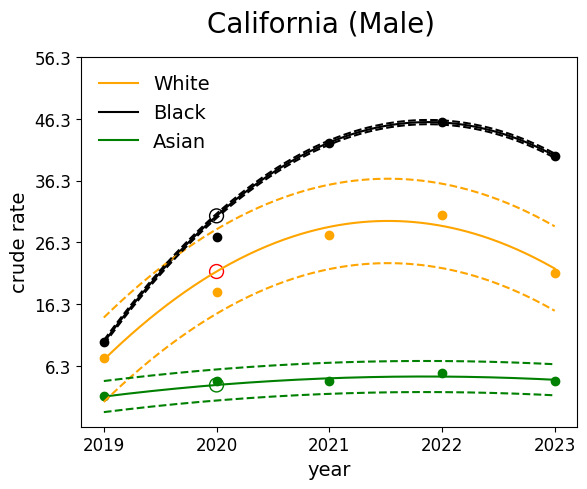

In [11]:
# Plots male graph
plt.rcParams.update({'font.size': 22})

plt.plot(x2cw_x, x2cw_y, color='orange')
plt.plot(x2cb_x, x2cb_y, color='black')
plt.plot(x2ca_x, x2ca_y, color='green')

plt.scatter(x2w,y2w, color='orange')
plt.scatter(2020.0, CM2w_covid["Crude Rate"],color='orange')
plt.scatter(2020.0, np.polyval(coeffMw,2020), s=100, edgecolors='red', facecolors='none')

plt.scatter(x2b,y2b, color='black')
plt.scatter(2020.0, CM2b_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffMb,2020), s=100, edgecolors='black', facecolors='none')

plt.scatter(x2a,y2a, color='green')
plt.scatter(2020.0, CM2a_covid["Crude Rate"],color='green')
plt.scatter(2020.0, np.polyval(coeffMa,2020), s=100, edgecolors='green', facecolors='none')

print(stdMb)
plt.plot(x2cw_x, x2cw_y+3*stdMw, color='orange', linestyle='dashed')
plt.plot(x2cw_x, x2cw_y-3*stdMw, color='orange', linestyle='dashed')
plt.plot(x2cb_x, x2cb_y+3*stdMb, color='black', linestyle='dashed')
plt.plot(x2cb_x, x2cb_y-3*stdMb, color='black', linestyle='dashed')
plt.plot(x2ca_x, x2ca_y+3*stdMa, color='green', linestyle='dashed')
plt.plot(x2ca_x, x2ca_y-3*stdMa, color='green', linestyle='dashed')

plt.suptitle('California (Male)', fontsize=20)
plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.legend(["White", "Black", "Asian"], frameon=False, fontsize=14)
plt.yticks(np.arange(min(y2w)-1.2, max(y2b)+15, 10.0))
plt.savefig('AttemptT40.4_MaleRaces_2R.svg')

In [12]:
# Smooths out graphs
x1cw_x = np.linspace(x1cw.min(), x1cw.max(), 300)
spl = make_interp_spline(x1cw, np.polyval(coeffFw,x1cw), k=3)
x1cw_y = spl(x1cw_x)

x1cb_x = np.linspace(x1cb.min(), x1cb.max(), 300)
spl = make_interp_spline(x1cb, np.polyval(coeffFb,x1cb), k=3)
x1cb_y = spl(x1cb_x)

x1ca_x = np.linspace(x1ca.min(), x1ca.max(), 300)
spl = make_interp_spline(x1ca, np.polyval(coeffFa,x1ca), k=3)
x1ca_y = spl(x1ca_x)

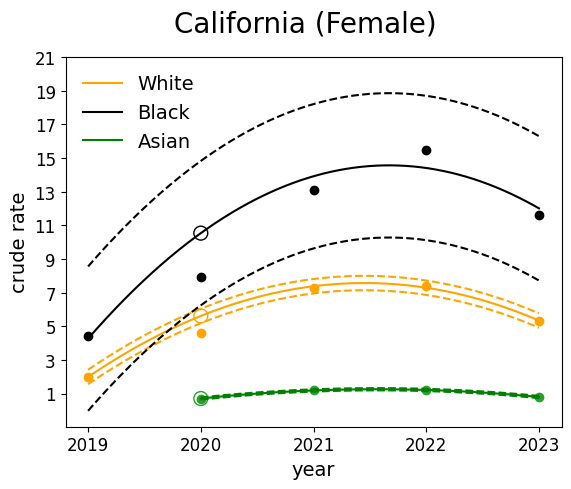

In [13]:
# Plots female graph
plt.rcParams.update({'font.size': 22})

plt.plot(x1cw_x, x1cw_y, color='orange')
plt.plot(x1cb_x, x1cb_y, color='black')
plt.plot(x1ca_x, x1ca_y, color='green')

plt.scatter(x1w,y1w, color='orange')
plt.scatter(2020.0, CF2w_covid["Crude Rate"],color='orange')
plt.scatter(2020.0, np.polyval(coeffFw,2020), s=100, edgecolors='orange', facecolors='none')

plt.scatter(x1b,y1b, color='black')
plt.scatter(2020.0, CF2b_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffFb,2020), s=100, edgecolors='black', facecolors='none')

plt.scatter(x1a, y1a, color='tab:green')
plt.scatter(2020.0, CF2a_covid["Crude Rate"],color='tab:green')
plt.scatter(2020.0, np.polyval(coeffFa,2020), s=100, edgecolors='tab:green', facecolors='none')

plt.plot(x1cw_x, x1cw_y+3*stdFw, color='orange', linestyle='dashed')
plt.plot(x1cw_x, x1cw_y-3*stdFw, color='orange', linestyle='dashed')
plt.plot(x1cb_x, x1cb_y+3*stdFb, color='black', linestyle='dashed')
plt.plot(x1cb_x, x1cb_y-3*stdFb, color='black', linestyle='dashed')
plt.plot(x1ca_x, x1ca_y+3*stdFa, color='green', linestyle='dashed')
plt.plot(x1ca_x, x1ca_y-3*stdFa, color='green', linestyle='dashed')

plt.suptitle('California (Female)', fontsize=20)
plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(min(y1w)-1, max(y1b)+6.2, 2.0))
plt.legend(["White", "Black", "Asian"], frameon=False, fontsize=14)
plt.savefig('AttemptT40.4_FemaleRaces_2R.svg')